In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Read and load data
iris = pd.read_csv("iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# Missing values
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
# Shuffle the table
iris = iris.sample(frac=1)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
116,117,6.5,3.0,5.5,1.8,Iris-virginica
94,95,5.6,2.7,4.2,1.3,Iris-versicolor
7,8,5.0,3.4,1.5,0.2,Iris-setosa


In [20]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


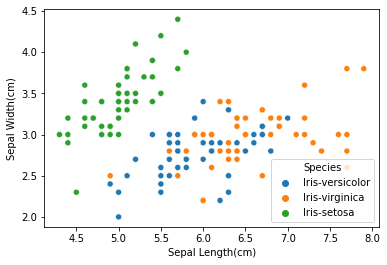

In [13]:
# Difference in sepal length and width per species
sns.scatterplot(x=iris["SepalLengthCm"], y=iris["SepalWidthCm"], hue=iris["Species"])
plt.xlabel("Sepal Length(cm)")
plt.ylabel("Sepal Width(cm)")
plt.show()

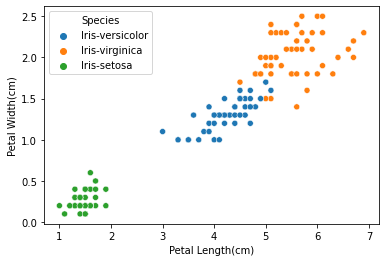

In [14]:
sns.scatterplot(x=iris["PetalLengthCm"], y=iris["PetalWidthCm"], hue=iris["Species"])
plt.xlabel("Petal Length(cm)")
plt.ylabel("Petal Width(cm)")
plt.show()

In [15]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


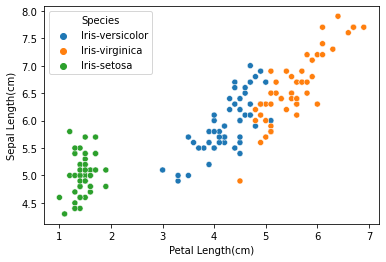

In [16]:
sns.scatterplot(x=iris["PetalLengthCm"], y=iris["SepalLengthCm"], hue=iris["Species"])
plt.xlabel("Petal Length(cm)")
plt.ylabel("Sepal Length(cm)")
plt.show()

### Clustering the sample using `KMeans`

* First, create the sample to cluster
* Using KMeans create clusters

In [18]:
# Create the sample(data)
iris_sample = iris.drop(["Id", "Species"], axis=1).values
species = iris["Species"].values

iris_sample[:5]

array([[6. , 2.7, 5.1, 1.6],
       [6.4, 2.9, 4.3, 1.3],
       [6.5, 3. , 5.5, 1.8],
       [5.6, 2.7, 4.2, 1.3],
       [5. , 3.4, 1.5, 0.2]])

In [19]:
species[:5]

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [21]:
from sklearn.cluster import KMeans

np.random.seed(42)

# Instantiate the KMeans model
kmean = KMeans(n_clusters=3)

# Fit the model to the sample
kmean.fit(iris_sample)

KMeans(n_clusters=3)

In [22]:
# Predict the labels
labels = kmean.predict(iris_sample)
labels[:5]

array([1, 1, 2, 1, 0])

**Evaluating the model**

You can use two methods:
* A crosstab to compare the labels and the actual species
* Inertia

Inertia measures the quality of the clusterings. A lower inertia means it was a good clustering.

In [25]:
df = pd.DataFrame({
    "labels": labels,
    "species": species
})
df.head()

,labels,species
0,1,Iris-versicolor
1,1,Iris-versicolor
2,2,Iris-virginica
3,1,Iris-versicolor
4,0,Iris-setosa


In [26]:
# Crosstab
pd.crosstab(df["labels"], df["species"])

species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,50,0,0
1,0,48,14
2,0,2,36


Using the above crosstab:
* 0 is the Iris setosa
* 1 is the Iris versicolor
* 2 is the Iris virginica

In [28]:
# Using inertia
kmean.inertia_

78.940841426146

C:\Users\ronni\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


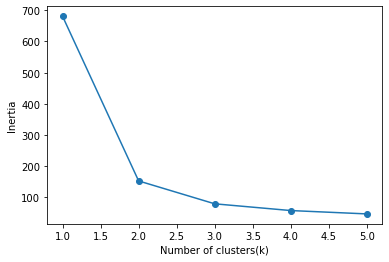

In [33]:
# You can compare different number of clusters
clusters = np.arange(1,6)
inertia = []

for c in clusters:
    model = KMeans(n_clusters=c)
    model.fit(iris_sample)
    inertia.append(model.inertia_)
    
plt.plot(clusters, inertia, marker="o")
plt.xlabel("Number of clusters(k)")
plt.ylabel("Inertia")
plt.show()

3 clusters was good.

**Improving the model**

To improve the model, standardize the features using `Standard Scaler`.
Use a pipeline to make the process easier

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

np.random.seed(42)

kmeans = KMeans(n_clusters=3)
sc = StandardScaler()

# Pipeline
pipeline = make_pipeline(sc, kmeans)

# Fit the pipeline on the sample
pipeline.fit(iris_sample)

# Predictions
labels = pipeline.predict(iris_sample)

In [37]:
# Evaluate using cross tab
df = pd.DataFrame({
    "labels": labels,
    "species": species
})

# Crosstab
pd.crosstab(df["labels"], df["species"])

species,Iris-setosa,Iris-versicolor,Iris-virginica
labels,,,
0,50,0,0
1,0,11,36
2,0,39,14


Using the above crosstab:
* 0 is the Iris setosa
* 1 is the Iris virginica
* 2 is the Iris versicolor

In [38]:
# Using inertia
kmean.inertia_

78.940841426146

In [39]:
# Add labels to the iris dataset to see if they were really correct
iris["labels"] = labels
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,labels
83,84,6.0,2.7,5.1,1.6,Iris-versicolor,2
74,75,6.4,2.9,4.3,1.3,Iris-versicolor,2
116,117,6.5,3.0,5.5,1.8,Iris-virginica,1
94,95,5.6,2.7,4.2,1.3,Iris-versicolor,2
7,8,5.0,3.4,1.5,0.2,Iris-setosa,0


After standardizing the sample, the 2nd model in fact gave us the correct labels unlike the first one. The labels cluster the samples to their actual species.

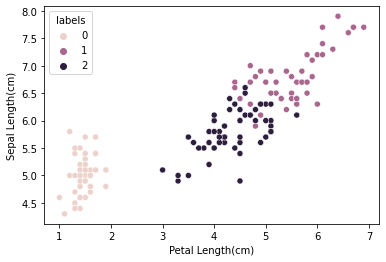

In [42]:
sns.scatterplot(x=iris["PetalLengthCm"], y=iris["SepalLengthCm"], hue=iris["labels"])
plt.xlabel("Petal Length(cm)")
plt.ylabel("Sepal Length(cm)")
plt.show()

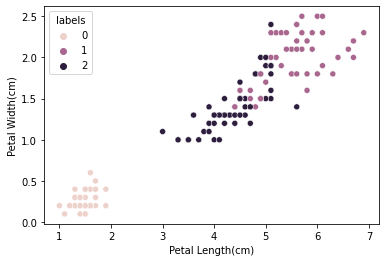

In [45]:
sns.scatterplot(x=iris["PetalLengthCm"], y=iris["PetalWidthCm"], hue=iris["labels"])
plt.xlabel("Petal Length(cm)")
plt.ylabel("Petal Width(cm)")
plt.show()

The plots are similar to the one plotted previously during EDA. Our improved model performed better.